In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.6 MB/s eta 0:00:00


In [2]:
import timm
from fastai.vision.all import *

# Meander

In [3]:
meander_path = "drive/MyDrive/parkinsons/Meander"
files = get_image_files(meander_path)
len(files)

264

(560, 550)


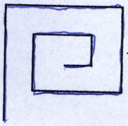

In [4]:
img = PILImage.create(files[65])
print(img.size)
img.to_thumb(128)

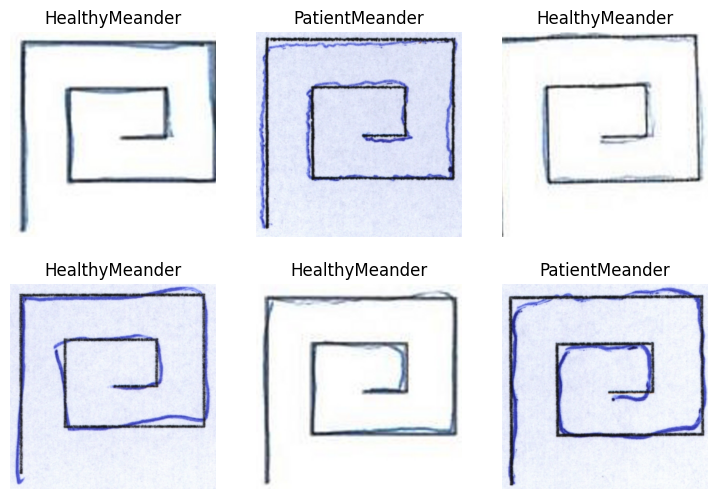

In [7]:
dls = ImageDataLoaders.from_folder(
    meander_path, bs=8, valid_pct=0.2, seed=42,
    item_tfms=Resize(384),
    batch_tfms=[])

dls.show_batch(max_n=6)

SuggestedLRs(valley=0.0012022644514217973, slide=0.0063095735386013985)

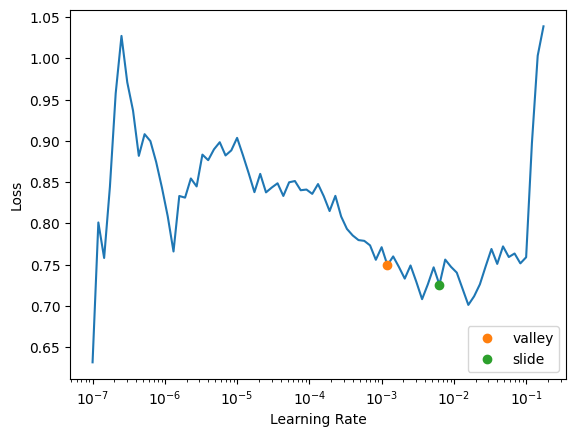

In [8]:
learn1 = vision_learner(dls, 'beit_base_patch16_384', metrics=error_rate)
learn1.lr_find(suggest_funcs=(valley, slide))

In [9]:
learn1.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.640518,0.211717,0.096154,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.478503,0.157905,0.057692,00:28
1,0.351321,0.990763,0.250000,00:27
2,0.544944,0.266655,0.096154,00:27
3,0.573723,0.567915,0.250000,00:27
4,0.478702,4.719431,0.403846,00:27
5,0.505674,0.154249,0.038462,00:27
6,0.474419,3.389313,0.538462,00:27
7,0.363125,0.115947,0.076923,00:27
8,0.316353,0.244054,0.134615,00:27
9,0.232147,0.056291,0.038462,00:27


# Spiral

In [10]:
spiral_path = "drive/MyDrive/parkinsons/Spiral"
files = get_image_files(spiral_path)
len(files)

268

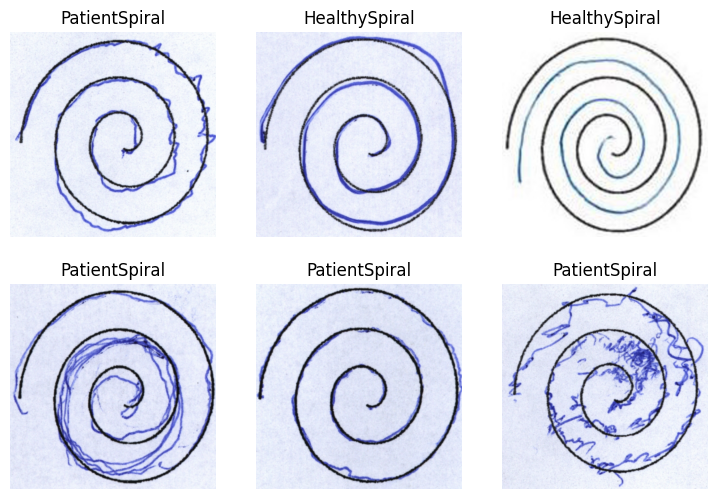

In [11]:
dls = ImageDataLoaders.from_folder(
    spiral_path, bs=8, valid_pct=0.2, seed=40,
    item_tfms=Resize(384),
    batch_tfms=[])

dls.show_batch(max_n=6)

In [12]:
learn2 = vision_learner(dls, 'beit_base_patch16_384', metrics=error_rate)
learn2.fine_tune(12, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.887047,1.046229,0.226415,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.633179,0.208145,0.094340,00:28
1,0.338127,2.009344,0.226415,00:27
2,0.441458,3.481781,0.415094,00:27
3,0.517543,1.889445,0.283019,00:28
4,0.495883,1.564753,0.301887,00:27
5,0.510985,1.588375,0.339623,00:28
6,0.373409,1.829534,0.226415,00:27
7,0.342667,0.912238,0.264151,00:28
8,0.266673,0.544766,0.113208,00:27
9,0.209695,0.260710,0.075472,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.633179,0.208145,0.094340,00:28
1,0.338127,2.009344,0.226415,00:27
2,0.441458,3.481781,0.415094,00:27
3,0.517543,1.889445,0.283019,00:28
4,0.495883,1.564753,0.301887,00:27
5,0.510985,1.588375,0.339623,00:28
6,0.373409,1.829534,0.226415,00:27
7,0.342667,0.912238,0.264151,00:28
8,0.266673,0.544766,0.113208,00:27
9,0.209695,0.260710,0.075472,00:28


# Circle

In [13]:
circle_path = "drive/MyDrive/parkinsons/Circle"
files = get_image_files(circle_path)
len(files)

66

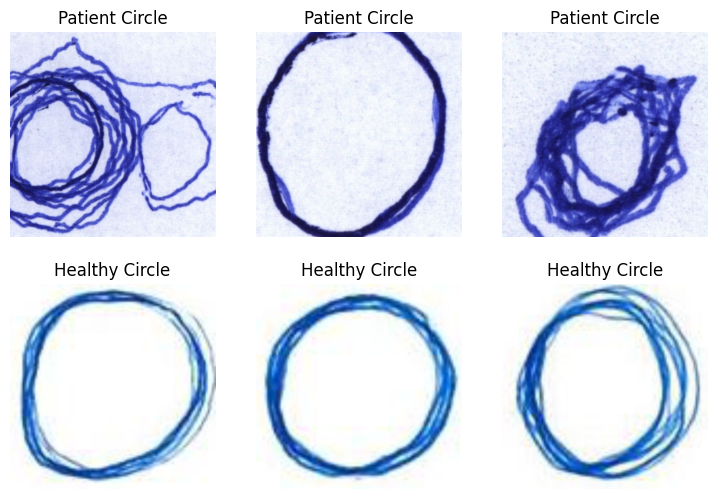

In [14]:
dls = ImageDataLoaders.from_folder(
    circle_path, bs=8, valid_pct=0.2, seed=39,
    item_tfms=Resize(384),
    batch_tfms=[])

dls.show_batch(max_n=6)

In [15]:
learn3 = vision_learner(dls, 'beit_base_patch16_384', metrics=error_rate)
learn3.fine_tune(12, 0.0001)

epoch,train_loss,valid_loss,error_rate,time
0,1.468355,1.227723,0.615385,00:20


epoch,train_loss,valid_loss,error_rate,time
0,1.218896,1.150492,0.692308,00:06
1,1.197126,1.069397,0.615385,00:06
2,1.115228,0.934132,0.384615,00:06
3,1.068021,0.827250,0.230769,00:07
4,1.031099,0.796191,0.230769,00:06
5,0.923900,0.722165,0.230769,00:06
6,0.882236,0.702657,0.307692,00:06
7,0.805077,0.727904,0.307692,00:06
8,0.744155,0.799873,0.307692,00:06
9,0.696334,0.724349,0.307692,00:06
